# Supervised Learning: Regression

This notebook is about regression-based techniques for predicting diabetes progression.

You will learn how to apply and evaluate common supervised learning techniques for predicting continuous variables.

In regression the response (or target) variable is represented by a numeric value instead of a class label.

We will also discuss regularization which is a technique that can be used to adjust model parameter fitting with the goal of avoiding overfitting.

### Agenda

0. Linear regression: basic concepts.
1. Load and pe-process the 'diabetes' dataset.
2. Applying simple linear regression.
3. Metrics used for evaluating the performance of a regression model
4. Applying multiple linear regression.
5. Regularization-based methods.

## 0. Linear regression 

Linear regression is a very simple approach for supervised learning, and it is a very useful tool for predicting a quantitative response.

Ingredients:

* Features consist of n independent variables
* Target/dependent variable is represented by $y$
* Relation between features and target is represented by the following equation

\begin{equation} y = b + a_1 \cdot x_1 + a_2 \cdot x_2 + ... + a_n \cdot x_n + e \end{equation}

where:

$b$ is the intercept,
$a_1$, $a_2$, …, $a_n$ are the regression weights or coefficients associated with the predictors $x_1, x_2, …, x_n$. $e$ is the error term (also known as the residual error), the part of $y$ that cannot be explained by the regression model.

$y$ is the observed value, while we can use the symbol $\hat{y}$ for the value predicted by the model. The model can be expressed in vector representation as  
$\hat{y} = b + \vec{a} \cdot \vec{x}$  
or  
$\hat{y} = \vec{w} \cdot \vec{x}$  
where in the latter notation it may be assumed that a constant feature ($x_0 = 1$) has been added to the data so that the intercept is $w_0 \cdot x_0 = w_0$.

The previous vector representations where considering just the predicted value. The observed value is  
$y = \hat{y} + e$

The figure below illustrates a simple linear regression model \begin{equation} \hat{y} = b_0 + b_1 \cdot x\end{equation}

<img src="PS3/Img/reg.png" width="600">

- the best-fit regression line is in red
- the intercept ($b_0$) and the slope ($b_1$) are shown in green
- the error terms ($e$) are represented by vertical black lines

### Behind the black box 

In order to obtain an effective model, we need two instruments.
* A measure of the total error of the model on the available samples.
* A strategy to reduce the error as much as possible.

#### Residual sum of squares (RSS)
It is a measure of the discrepancy between the data and an estimation model. It is the sum of the squares of residuals (deviations of predicted values from actual empirical values of data). 

* Prediction: $\hat{y} = b + \vec{a} \cdot \vec{x}$
* Observed: $y$
* RSS = $\sum{\left(\hat{y} - y\right)}^2$

A small RSS indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.

<img src="PS3/Img/reg_example.gif" width="600">

#### Gradient descent algorithm (basic idea)

* Linear regression tries to minimize the loss function (e.g. RSS) using Gradient Descent. 
* The objective of Gradient Descent is to obtain the best weights such that the loss is minimal.

  - Define the objective function -- i.e. the loss of function --> RSS.
  - Randomly initialize weights $\vec{a}$ and $b$.
  - Calculate the gradient i.e change in loss when $\vec{a}$ and $b$ are changed.
  - Adjust weights by subtracting the gradient --> reduce loss.
  - Repeat the whole process until the weights do not significantly change any further (convergence).

## 1.  Load and pre-process the 'diabetes' dataset

We will need some commonly used libraries such as pandas, numpy and matplotlib along with scikit learn itself.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### The 'diabetes' dataset

The 'diabetes' dataset is part of the collection of standard datasets provided by *Scikit learn*. 

In this dataset, ten baseline variables (features), age, sex, body mass index, average blood pressure, and six blood serum measurements (s1, s2, s3, s4, s5 and s6) were obtained for each of 442 diabetes patients, along with the response of interest, a quantitative measure of disease progression ($y$) one year after baseline.

This dataset represents a classic regression problem, where the challenge is to model response $y$ based on the ten features. This model can then be used for two purposes:

1. to identify the important features (out of the ten mentioned above) that contribute to the disease progression (KNOWLEDGE DISCOVERY)
2. and to predict the response or risk for future patients based on the features (PREDICTION).

In [121]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Let's build a *dataframe* object

Similarly to the *'cancer'* dataset, the *'diabetes'* object belongs to the class *Bunch*, which corresponds to a collection of various objects bunched together in a dictionary-like format.

These objects include the feature matrix "data" and the target vector "target". 

As we did for the cancer dataset, we will now create a pandas dataframe containing all the ten features and the response variable (diabetes measure) using the following commands:

In [122]:
type(diabetes) 

sklearn.utils.Bunch

Note that *diabetes* is an object and we use the 'dot' *(.)* operator to access its attributes (https://pythonguide.readthedocs.io/en/latest/python/datatypes.html).

In [123]:
type(diabetes.data) # note that 'diabetes' is 

numpy.ndarray

Note that the attrbiute 'data' is an 2-dimensional array, one for the observation (rows) and a second one for the features (columns). 

In [124]:
diabetes.data.ndim

2

In [125]:
np.shape(diabetes.data)

(442, 10)

In order to create a data.frame we first plug in the features of the 'diabetes' dataset, and then we add an extra column which stores the target variable

In [126]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) 
data['target'] = pd.Series(diabetes.target)

### Data Pre-processing and Exploratory Data Analysis

The description contains most of the basic information, but let's check that it's correct:

In [127]:
data.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.301121e-16 -4.563971e-16  3.863174e-16 -3.848103e-16 -3.398488e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

Note: sex has been converted to a numerical value:

In [58]:
data.sex.value_counts()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

Let's see what the target looks like:

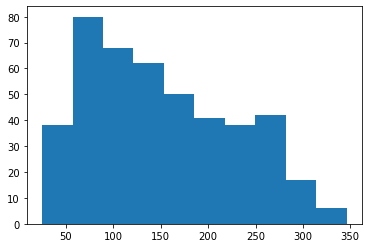

In [59]:
plt.hist(data['target'])
plt.show()

### Scaling, normalizing, standardizing?

As you can see from the describe method, the diabetes data is already standardized.

**Recap** (*From https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff*):

* “Rescaling” a vector means to add or subtract a constant and then multiply or divide by a constant, as you would do to change the units of measurement of the data, for example, to convert a temperature from Celsius to Fahrenheit.

* “Normalizing” a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

* “Standardizing” a vector most often means subtracting a measure of location and dividing by a measure of scale. For example, if the vector contains random values with a Gaussian distribution, you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1.

### WHY DON'T WE SCALE THE DATA?

### Checking missing values
The counts were the same in *describe* but we can check to be sure:

In [60]:
data.isnull().values.any()

False

### Checking for correlated variables

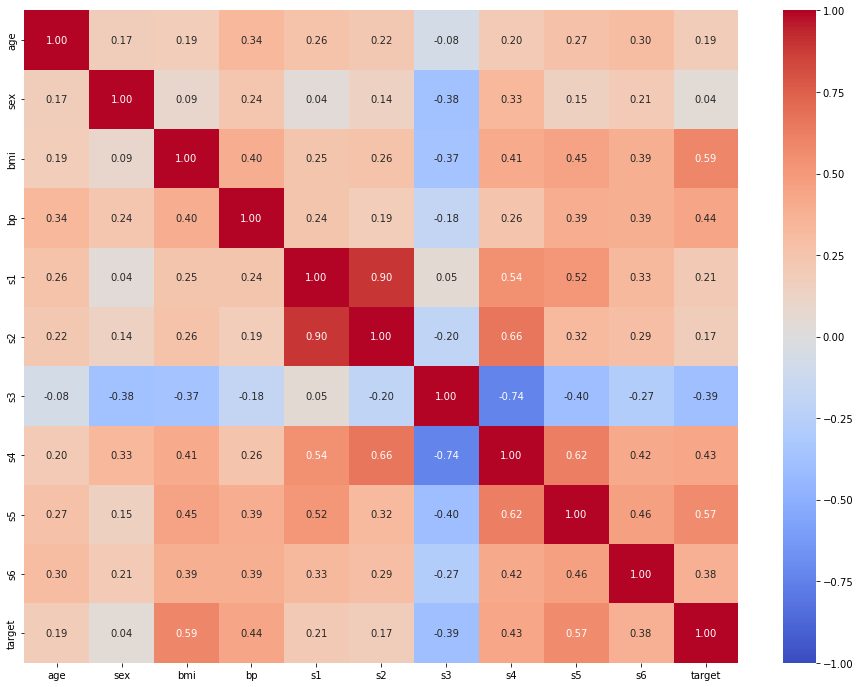

In [61]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm', vmin = -1, vmax = 1)
plt.show()

From the heatmap we can see that many features are at least somewhat correlated with the target.

Note that in order to select data by row numbers we use **.iloc**, and to select data by label or by a conditional statement we use **.loc**. **.iloc**

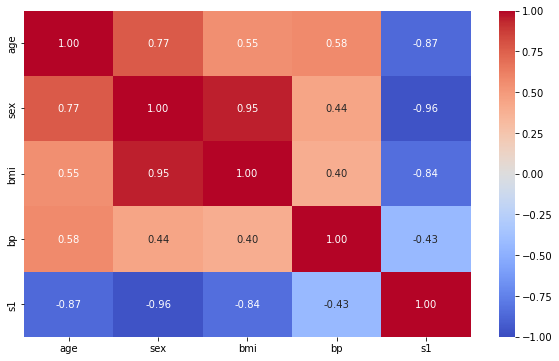

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.iloc[:5,:5].corr(),annot=True,fmt='.2f',cmap='coolwarm', vmin = -1, vmax = 1)
plt.show()

## 2. Applying simple linear regression

The simplest form of linear regression is where there is only one feature of a predictor variable/feature. We often hear that a healthy BMI (Body Mass Index) is conducive to a lower chance of developing a diabetic condition.

### Setting up testing and training sets 

In [63]:
from sklearn.model_selection import train_test_split 

bmi_train, bmi_test, y_train, y_test = train_test_split(data[['bmi']], # selecting using a list to get a 2 dimensional DataFrame
                                                        data['target'], # selecting using a string to get a 1 dimensional Series
                                                        test_size = 0.2, random_state = 42) 

### Create a simple linear regression model

The steps to building a machine learning model pretty much remain the same as discussed in the previous session on classification models. 

Let us build a simple linear regression model to quantify the relationship between BMI and diabetes:

In [64]:
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()
# Fitting the simple lr model to the training sets
regr.fit(bmi_train, y_train)

LinearRegression()

### Interpretation

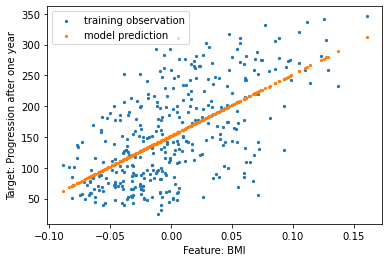

In [65]:
plt.scatter(bmi_train, y_train, s=5, label='training observation')
plt.scatter(bmi_train, regr.predict(bmi_train), s=5, label='model prediction')
plt.xlabel('Feature: BMI')
plt.ylabel('Target: Progression after one year')
plt.legend()
plt.show()

You can access the coefficients and intercept like this:

In [66]:
regr.coef_

array([998.57768914])

In [67]:
regr.intercept_

152.00335421448227

The coefficient in the regression equation is 999. 

This coefficient represents the mean increase of the dependent variable ($\hat{y}$) for every additional unit of the independent variable (*bmi*). 

Note here that the coefficients represent associations, not causations.

The intercept is the expected mean value of Y when all X=0.
If X never equals 0, then the intercept has no intrinsic meaning.

### Building the residual plot
The residual plot is a diagnostic tool you can use with regression models, it shows just the errors (residuals):

Text(0, 0.5, 'Residuals')

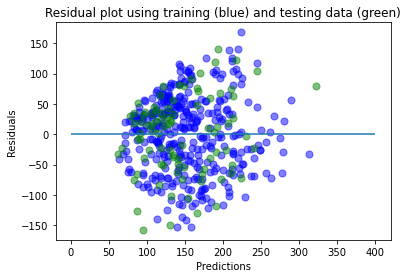

In [68]:
plt.scatter(regr.predict(bmi_train), regr.predict(bmi_train) - y_train, c='b', s=50, alpha=0.5)
plt.scatter(regr.predict(bmi_test), regr.predict(bmi_test) - y_test, c='g', s=50, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=400)
plt.title("Residual plot using training (blue) and testing data (green)")
plt.xlabel("Predictions")
plt.ylabel("Residuals")

**How should the overall pattern of the residuals look like?**

## 3. Metrics used for evaluating the performance of a regression model
Visually (based on first plot in last section), there seems to be a positive linear relationship between BMI (Body mass index) and the diabetes measure ($y$), that our model (orange points) is trying to capture. 

But how good is it in doing so?

**Mean squared error (MSE)** measures the expected value of the squared (quadratic) error or loss.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R-squared** is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the $R^2$ of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

\begin{equation*}
R^2 = 1-\frac{\sum_{i} (y - \hat{y})^2}{\sum_{i} (y - \overline{y})^2},
\end{equation*}
where $\hat{y}$ is the predicted value and $\bar{y}$ is the mean.

Other relevant regression/related metrics are described in http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics.

Mean squared error: 4061.83
R2 score: 0.23


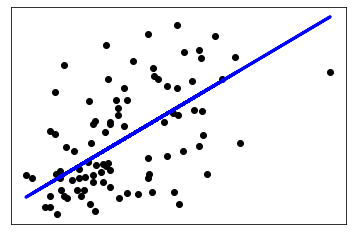

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the response values and saving them in an object called 
y_pred = regr.predict(bmi_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(bmi_test, y_test, color='black')
plt.plot(bmi_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

*Is that a "good" R-squared value?*

* It's hard to say. 
* R-squared is capped at 1, and higher is better because it means that more variance is explained by the model. The value can get lower that 0 in extreme cases if the model is performing worse than the optimal horizontal hyperplane.
* The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

### Apply cross-validation

Let's use a more robust evaluation strategy: cross-validation.

In [70]:
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score
# storing the ten scores in an object called mse
mse = cross_val_score(regr, data[['bmi']], data['target'], scoring='neg_mean_squared_error', cv=10)
# taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-3906.91899010684

Why **negative** mean squared error?

All scikit-learn scorer objects follow the convention that higher return values are better than lower return values. Hence metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

## 4. Applying multiple linear regression

Let's check if adding more features improves the prediction model.

This means that we are seeking to build a linear regression model with multiple features, also called multiple linear regression.

The basic steps will remain the same as the previous model, with the only difference being that we will use the whole feature matrix X (all ten features) instead of just one feature.

In [71]:
# instantiating
mul_reg = LinearRegression()
# storing the ten scores in an object called mse
mse = cross_val_score(mul_reg, diabetes.data, diabetes.target, scoring='neg_mean_squared_error',cv=10)
# taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-3000.3810328390514

We see that adding the nine remaining features to the model along with bmi, increases the average *'neg_mean_squared_error'* from almost -3906.92 to about -3000.38, which is a considerable improvement.

### Interpretation

Let's take a look at the coefficient values of the model:

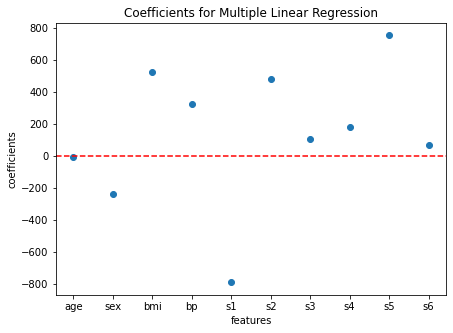

In [72]:
# we need to fit the model on the whole set
mul_reg.fit(data.iloc[:,:-1], data['target'])
# fetching feature names from the dataframe df
feature_names = data.columns[:-1]
# Using matplotlib commands to plot
plt.figure(figsize=(7,5))
plt.scatter(range(len(mul_reg.coef_)), mul_reg.coef_)
plt.axhline(0, color='r', linestyle = 'dashed')
plt.xticks(range(len(feature_names)), feature_names)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

#### Which are the most informative features?

We can observe that in the trained model, the features *bmi*, *s1*, *s2* and *s5* are having a considerable impact on the progression of diabetes, as all of them have high estimated coefficient values.

Note that almost none of the estimated coefficient values are near 0. 

Usually we can safely assume that only some of the features are actually relevant and small coefficients are likely related to noise patterns in the training data. 

It would be convenient (especially when dealing with high dimensional data like in omics), if there was an automatic way to account for this assumption - such that in the learned model, features with smaller (or very low) coefficient values would be 'shrunk' toward zero ...

### Multicollinearity

One of the basic assumptions of a multiple linear regression model is that there should be no multicollinearity among the features. 

What this essentially means is that ideally the features should have no or very little correlation with each other. 

This is important for the interpretability of coefficients and their significance.

*So now it's the time to check the correlation plot again:*


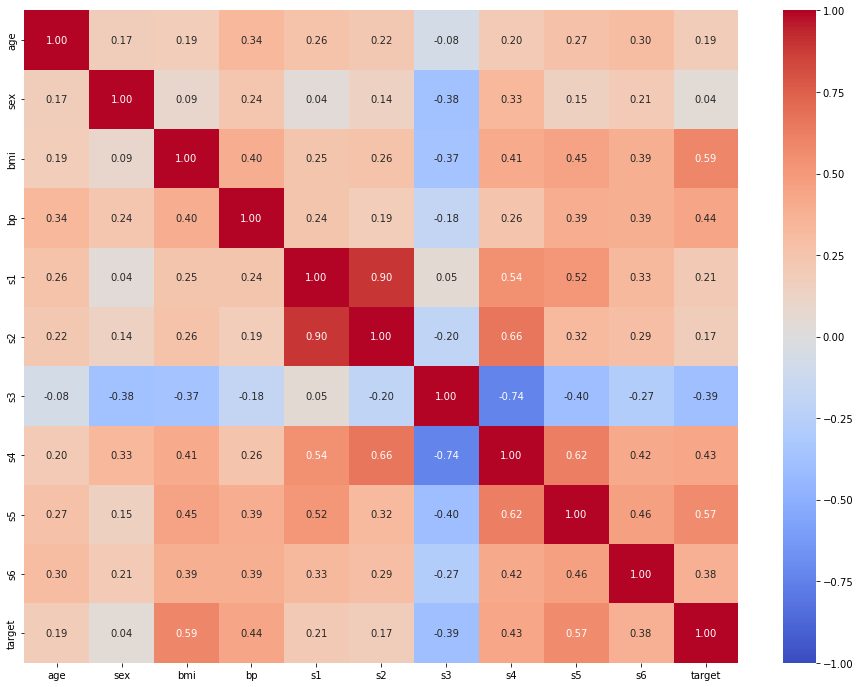

In [73]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm', vmin = -1, vmax = 1)
plt.show()

You might notice that indeed some features are strongly correlated. E.g. *s1* and *s2* have a very high positive correlation of about 0.90. 

This is inducing **multicollinearity** in the model.

In the model we have:

In [74]:
print('s1 coef = {0:.1f}\ns2 coef = {1:.1f}'.format(mul_reg.coef_[feature_names == "s1"][0], mul_reg.coef_[feature_names == "s2"][0]))

s1 coef = -792.2
s2 coef = 476.7


S1 and s2 are strongly correlated with each other and both are positively correlated to the target (albeit weakly) but the coefficients are in opposite directions in the model!

A high correlation between the two feature variables gives rise to several problems. 

Typically if we include one of such strongly correlated features in the model, including the others will increase model complexity while having little impact on the training error. 

This goes against the principle of 'parsimony' in model building, which dictates that a simpler model with fewer variables is always preferred to a more complex model with too many features. 

The coefficients of correlated variables can also be sensitive to the subset of data points used for training or the initialization of model parameters.

Such models might not be able to generalize well to unseen data due to **overfitting**.

## 5. Regularization-based models

To counter issues such as multicollinearity and uninformative features, we can use regularization techniques which allow us to decrease the variance of the model by adding bias such that the total error is reduced. 

Lower variance implies that the problem of overfitting is tackled automatically, as the model generalizes well to unseen data after regularization. 

#### *But how do we lower the variance?*

The regularization techniques work by adding penalty factors to the original cost function such that high coefficient values are penalized, resulting in the learning algorithm setting them closer to zero.

Features with significant coefficients are identified after a regularization procedure and other features can be dropped. 

Common regularization techniques for linear models:

- **Ridge regression** (also known as "L2 regularization"): shrinks coefficients toward zero (but they never reach zero), penalizes high coefficients more than low coefficients
- **Lasso regularization** (also known as "L1 regularization"): shrinks some coefficients all the way to zero
- **ElasticNet regularization**: combination of Ridge and Lasso

Lasso regularization is used when we expect to have many irrelevant features, since a feature with a zero coefficient is essentially removed from the model. 

#### *How does regularization work?*

- Instead of minimizing the "loss function" (mean squared error), it minimizes the "loss plus penalty".
- A tuning parameter alpha (or sometimes lambda) imposes a penalty on the magnitude of coefficients.
- As alpha approaches zero the penalty disappears and the model is equivalent to a normal linear model.
- Increasing the alpha penalizes the coefficients more and shrinks them further toward zero.


### Ridge Regression

Ridge regression addresses the overfitting problem by imposing a penalty on the size of coefficients. The optimization problem is defined as minimizing a penalized residual sum of squares,

\begin{equation*}
\min_{w} \left(\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2 + \alpha\sum_{j=1}^{p} w_j^2\right)
\end{equation*}

where $n$ is the number of samples, $p$ is the number of coefficients, and $\alpha$ $\geq$ 0 is a tunable parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity and the model less prone to overfitting.
The value of alpha can be any positive real number value. When alpha is 0, it is same as performing a multiple linear regression.

* [Ridge documentation](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)
* Lowers the impact of outliers

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X = data.iloc[:,:-1] # remove the last column from the selection, since it corresponds to the target variables
y = data['target']

# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
ridge = GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10)

# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(X,y).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.04}
The best score for the best Ridge estimator is: -2997.1867937193456


We see that by using Ridge regression the average 'neg_mean_squared_error' increases from almost -3000.38 to about -2997.19, which is a modest improvement.

Let's again visualize the ten coefficient estimates for the ridge regression model using a simple line plot:

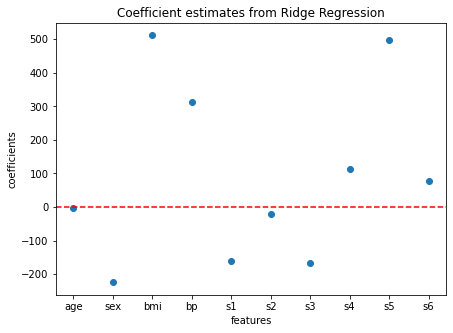

In [76]:
# Creating an object containing the best ridge regression model
best_ridge_model = Ridge(alpha=0.04)
# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X,y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(7,5))
plt.scatter(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color='r', linestyle='dashed')
plt.xticks(range(len(feature_names)),feature_names)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

Previously, features s1 and s2 came out as important features, however, their coefficient values are significantly reduced after ridge regularization. Bmi and s5 still remain important.

<a id="reg_path"></a>
### Compute the regularization path
Let's try to see what's happening at different alpha settings:

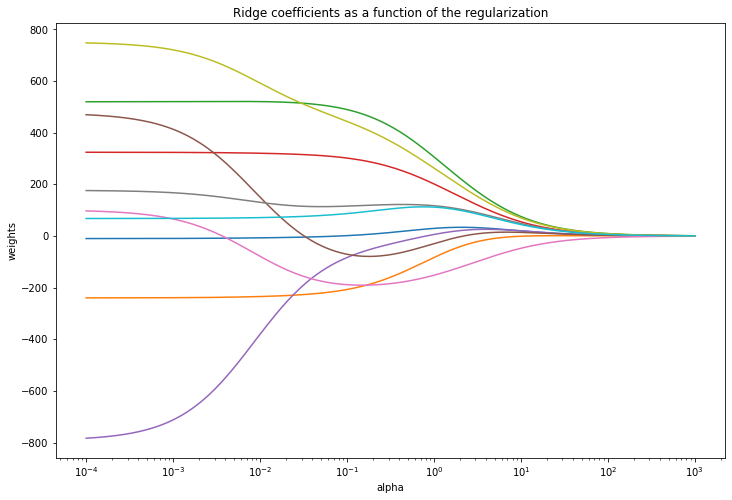

In [77]:
n_alphas = 500
alphas = np.logspace(-4, 3, n_alphas)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results
plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

The coefficients are almost unaffected until $\alpha > 10^{-3}$ and everything becomes very close to 0 after $\alpha > 10^1$. Interestingly not all weights are affected equally: they start decreasing at different points. Some coefficients also switch sign at some $\alpha$. 

### Lasso regression

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameters, effectively reducing the number of variables upon which the prediction is dependent.

Mathematically, it consists of a linear model trained with *L1-norm* prior as regularizer. The objective function to minimize is:

\begin{equation*}
\min_{w} \left(\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2 + \alpha\sum_{j=1}^{p} \left|w_j\right|\right)
\end{equation*}

where $\alpha$ $\geq$ 0 is a tunable parameter that controls the amount of shrinkage. A lasso optimizer thus solves the minimization of the mean sum of squares with the addition of a penalization that is proportional to the sum of the absolute values of the coefficients.

* [Lasso](http://scikit-learn.org/stable/modules/linear_model.html#lasso) documentation.
* The penalty is made up of the sum of absolute values (i.e. magnitudes) of coefficients, unlike in Ridge regression (where it was made up of the sum of squares instead).

Giving a higher value of alpha (any positive real number value) implies a higher penalty on the sum of magnitudes of coefficient estimates.

Let's again use *GridSearchCV* to compile the optimal value of alpha.

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso= GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10)
print('The best value of alpha is:',lasso.fit(X,y).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',lasso.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.06}
The best score for the best Ridge estimator is: -2987.4180821246437


We are able to obtain slightly better results as compared to the Ridge regularization (the negative *mse* decreases from -2997.19 from (Ridge regularization) to about -2987.42.

Let's visualize all the coefficients for Lasso:

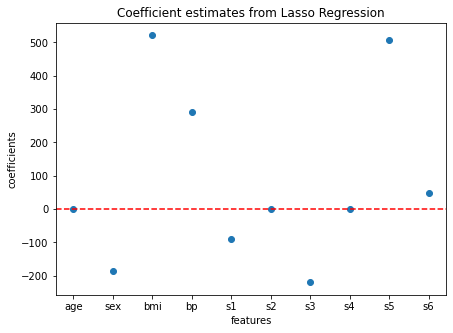

In [79]:
# Creating an object containing the best Lasso regression model
best_lasso_model = Lasso(alpha=0.06)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X,y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(7,5))
plt.scatter(range(len(feature_names)), best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='dashed')
plt.xticks(range(len(feature_names)), feature_names)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

As we can observe, Lasso regularization completely eliminates features age, s2 and s4 from the model (as their estimated coefficients are 0) and generates in output a much simpler model including less variables and achieving the overall best score.

In [80]:
best_lasso_coeffs

array([  -0.        , -186.30924508,  520.89411638,  291.19604139,
        -90.06855506,   -0.        , -220.20726443,    0.        ,
        506.42221212,   49.07461404])

### Compute the regularization path

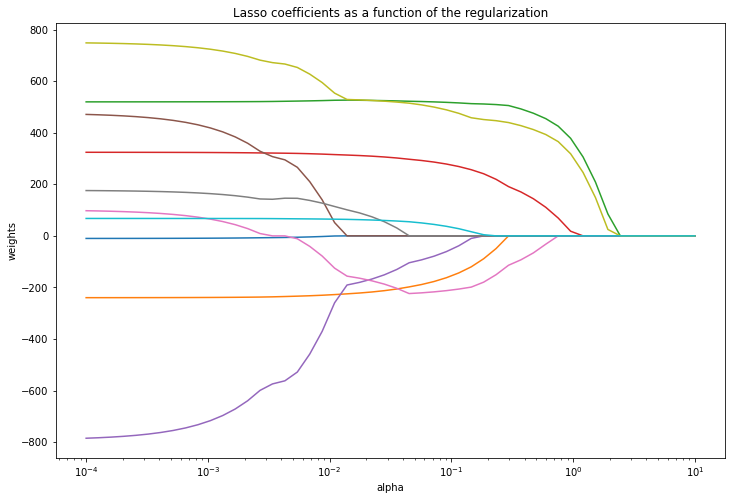

In [81]:
n_alphas = 50
alphas = np.logspace(-4, 1, n_alphas)
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# Display results
plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### Elastic-net regression

ElasticNet is a linear regression model trained with both L1 and L2 regularizing penalties. This combination allows for learning a sparse model where fewer weights are non-zero like Lasso, while still maintaining the other regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter $\rho$.

The objective function to minimize is in this case

\begin{equation*}
\min_{w} \left(\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2 + \alpha\rho\sum_{j=1}^{p} \left|w_j\right| +
\frac{\alpha(1-\rho)}{2}\sum_{k=1}^{p} w_j^2\right)
\end{equation*}

* [Elastic-net](http://scikit-learn.org/stable/modules/linear_model.html#elastic-net) documentation.

The above cost function has two important hyperparameters: alpha and l1_ratio ($\rho$). 

**Alpha** in case of Elastic Net regularization is a constant that is multiplied with both L1(Lasso) and L2(Ridge) penalty terms.

The hyperparameter **l1_ratio** ($\rho$) is called the mixing parameter such that $0 \leq \rho \leq 1$.

* When *l1_ratio* is 1, it means that the share of L1 (Lasso) is 100% and that of L2 (Ridge) is 0%, i.e. same as a Lasso regularization. 
* When *l1_ratio* is 0, it is same as a *Ridge regularization*.

The optimal values for both *alpha* and *l1_ratio* can be determined using GridSearchCV algorithm as follows:

In [82]:
from sklearn.linear_model import ElasticNet
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
                'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic = GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10)

In [83]:
print(elastic.fit(X,y).best_params_)

{'alpha': 0.06, 'l1_ratio': 1}


In [30]:
elastic.fit(X,y).best_score_

-2987.4180821246428

In this case, the best l1_ratio turns out to be 1, which is the same as a Lasso regularization. Consequently, the best score also remains the same as obtained from Lasso regularization earlier.

In [31]:
best_elast_model = ElasticNet(alpha=0.06, l1_ratio=1)
best_elast_coeffs = best_elast_model.fit(X,y).coef_

### Comparing the different regression-based models

* Multiple linear regression without any regularization
* Ridge regularization
* Lasso regularization
* Elastic-net regularization

Creating a dataframe containing coefficient estimates for the four models.

In [32]:
comparing_models = pd.DataFrame({'without_regularization':mul_reg.coef_,
                                 'Ridge':best_ridge_coeffs,
                                 'Lasso':best_lasso_coeffs,
                                 'Elast':best_elast_coeffs}, index=feature_names)
comparing_models

without_regularization       Ridge       Lasso       Elast
age              -10.012198   -3.609650   -0.000000   -0.000000
sex             -239.819089 -224.329482 -186.309245 -186.309245
bmi              519.839787  511.203719  520.894116  520.894116
bp               324.390428  313.552715  291.196041  291.196041
s1              -792.184162 -161.533876  -90.068555  -90.068555
s2               476.745838  -19.892974   -0.000000   -0.000000
s3               101.044570 -166.679798 -220.207264 -220.207264
s4               177.064176  113.950246    0.000000    0.000000
s5               751.279321  496.222270  506.422212  506.422212
s6                67.625386   77.443906   49.074614   49.074614

#### Plot regression coeffiecients

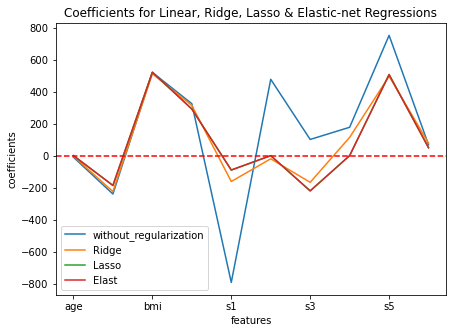

In [33]:
comparing_models.plot(figsize=(7, 5))
plt.axhline(0, color='r', linestyle = 'dashed')
plt.title("Coefficients for Linear, Ridge, Lasso & Elastic-net Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

### Important notes


Although Ridge regularization shrinks the values of coefficient estimates considerably by pulling them closer to zero, it does not make them exactly zero.

On the other hand, Lasso regularization completely eliminates features ('age', 's2' and 's4' in our example) from the model by assigning their coefficients zero values. This results in a simplified model.

The best average score is generated by the Lasso regularization (-2987.42). So, it provides the best performance. Though, naturally, this is not always the case.

It is not possible to know in advance the best l1_ratio, so unless we have a reason to fix a kind of regularization (e.g. we want a parsimonious model so we choose Lasso) we have to optimize the parameter on the data.

## Summary

Linear regression is a versatile and transparent basic method. 

The most common objective functions and metrics in regression are related to the squared errors of the predictions. 

We can modify these objective functions by adding penalty terms which introduce different biases to 'regularize' the model parameters.

## Exercises
Using the diabetes data set:

In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) 
y = pd.Series(diabetes.target)

Previously we did the train-test split and performed CV based grid search on the training data, but when the performances are close (as in this case) and the model is not well suited to the task (we have a lot of unexplained variance), the subset of data used for hyper-parameter selection can also have a significant impact on selecting the best method. 

To better estimate the effect of parameter selection, we could repeat the selection of hyper-parameters for different train-test splits. To do this we could make a train-test split inside a for loop after shuffling the data at every iteration. Another similar method we could use is nested cross-validation. Nested cross-validation splits the data into folds for the first time in an outer CV (used for estimating test performance), and then for each fold we split the training folds again into folds a second time in order to evaluate the performance of different hyper-parameter settings. 


## 1. Evaluate model selection by using hold out with cross validation (0.5p)
Firstly, do a simple holdout test set and use CV for model selection (a.k.a., hyper-parameter tuning). Use the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso) model with a grid of different L1 penalties. 

Step 1: Define a holdout test set

Step 2: Tune the hyper-parameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV)

Step 3: Check the performance of the tuned model in test set

## 2. Evaluate model selection by using repeated hold out with cross validation (0.5p)
Now that you have recapped the basics, we can start improving this evaluation. Instead of a single holdout we can repeat the process several times while randomly selecting the holdout set each time. 

Step 1: Define a holdout test set

Step 2: Tune the hyper-parameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV)

Step 3: Record the performance of the tuned model on test set

Step 4: Repeat 1-3 until you have at least 10 estimates for the test performance (please use a for loop)

Step 5: Print the mean and standard deviation of the test performance

## 3. Evaluate model selection by using nested cross-validation (1p)
When using repeated hold out, since the test set is random every time datapoints are selected different number of times for the test set. With increasing number of repeats, every point will become more likely to be selected at least once. Cross-validation is a balanced way to select datapoints and we can use it for the test set as well as the model selection. In practice, we only need to change the splitting strategy from random sampling to CV. You can use the [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) object in sklearn with 5 splits. Hint: use the *split* method and a for loop. 

Graphicall illustrations showing the difference between cross validation and nested cross validation.

**cross validation**

<img src="PS3/Img/cv.png" width="500"/>

**nested cross validation**

<img src="PS3/Img/nested_cv.png" width="500"/>

[From https://www.analyticsvidhya.com/blog/2021/03/a-step-by-step-guide-to-nested-cross-validation/]

Step 1: Define training and test sets from CV folds

Step 2: Tune the hyper-parameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV)

Step 3: Record the performance of the tuned model on test set

Step 4: Repeat 1-3 until loop is done

Step 5: Print the mean and standard deviation of the test performance

## 5. How do the best hyper-parameters and coefficients vary between repeats? (2p)
In order to better understand, what is going on(/wrong) in the model we could check the selected hyper-parameters and regression coefficients in each fold. Use the repeated hold-out with GridSearchCV. Hint: You can access the tuned model from the search via the *best_estimator_* attribute and then see [Lasso documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso) for how to obtain the coefficients.

Step 1: Define a holdout test set

Step 2: Tune the hyper-parameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV)

Step 3: Record the hyper-parameters and coefficients of the tuned model on test set

Step 4: Repeat 1-3 until you have at least 10 estimates for the test performance (please use a for loop)

Step 5: Print the mean and standard deviation of the hyper-parameters and coefficients or plot them using box-plots or pair-wise scatter plots